In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [59]:
df = pd.read_csv('cardio.csv')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [60]:
df['age'] = round(df['age']/365, 2)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.39,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.42,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.66,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.28,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.87,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52.71,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61.92,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52.24,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61.45,1,163,72.0,135,80,1,2,0,0,0,1


<Axes: xlabel='age', ylabel='weight'>

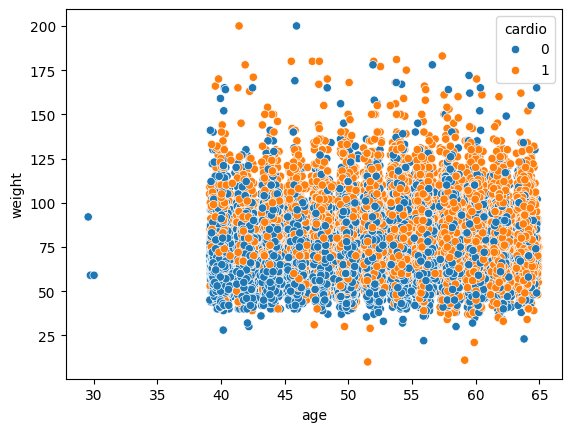

In [61]:
sns.scatterplot(x='age', y='weight', data=df, hue='cardio')

<Axes: xlabel='weight', ylabel='Count'>

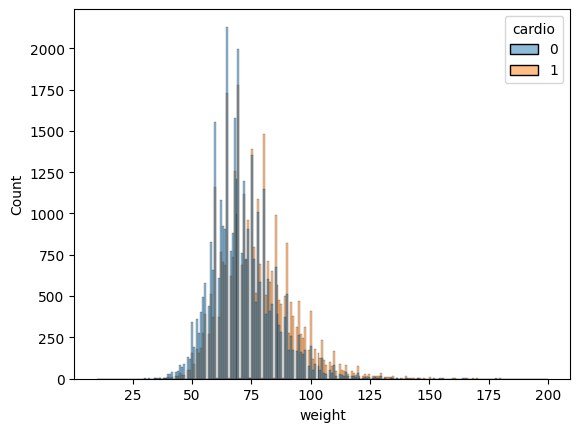

In [62]:
sns.histplot(df, x='weight', hue='cardio')

<Axes: xlabel='age', ylabel='Count'>

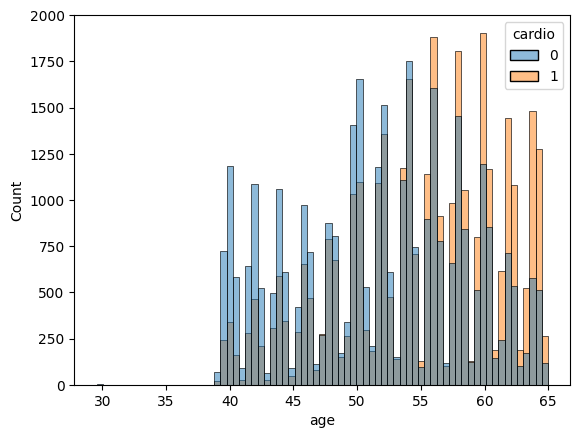

In [63]:
sns.histplot(df, x='age', hue='cardio')

In [64]:
X = df.drop(['id','cardio'], axis=1)
y = df['cardio']

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(f"No. of rows in total: {df.shape[0]}\nNo. of rows in training: {X_train.shape[0]}\nNo. of rows in testing: {X_test.shape[0]}")

No. of rows in total: 70000
No. of rows in training: 56000
No. of rows in testing: 14000


In [67]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

mlp_classifier = MLPClassifier(hidden_layer_sizes=(10,90), activation='relu',learning_rate='constant')
mlp_classifier.fit(X_train, y_train)
print(f"Training accuracy: {accuracy_score(y_train, mlp_classifier.predict(X_train)) * 100:.2f}%")
print(f"Testing accuracy: {accuracy_score(y_test, mlp_classifier.predict(X_test)) * 100:.2f}%")

Training accuracy: 72.22%
Testing accuracy: 72.56%


In [68]:
import warnings
warnings.filterwarnings('ignore')

In [69]:
sample_input = [[20, 1, 160, 62, 120, 60, 1, 1, 0, 0, 1]]

predicted = mlp_classifier.predict(sample_input)
if predicted[0] == 0:
    print("You don't have a cardio vascular problem")
else:
    print("You might have a cardio vascular problem")

You don't have a cardio vascular problem


In [70]:
sample_input = [[20, 1, 160, 92, 200, 130, 1, 1, 1, 1, 1]]

predicted = mlp_classifier.predict(sample_input)
if predicted[0] == 0:
    print("You don't have a cardio vascular problem")
else:
    print("You might have a cardio vascular problem")

You might have a cardio vascular problem
